In [1]:
from script.model_localization import pyramid, sliding_window, iou_bbox, non_maximum_supperssion, visualize_bbox
from script.model_classification import SVMObjectClassifier
from sklearn.model_selection import train_test_split
from script.dataset import load_vehicle_dataset
from script.feature_source import FeatureExtracter
from script.training import training_model
from script.slider import Slider
import numpy as np
import argparse
import time
import cv2
import os

In [2]:
image_path = './test_images/highway-45-46.jpg'
thresh = 0.8

In [3]:
sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb 
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2'
}
exist_path = './save_model/model.pkl'
save_path = './save_model'
feature_extracter = FeatureExtracter(**sourcer_params)

In [4]:
# load the image and define the window width and height
image = cv2.imread(image_path)
windowSize = [(80, 80)]
X, y = load_vehicle_dataset()
feature_extracter = FeatureExtracter(**sourcer_params)
model = training_model(X, y, feature_extracter, './save_model', evaluate=True)

Loaded dataset in 4.41 seconds
Vehicle images shape:  (8792, 64, 64, 3)
Non-vehicle images shape:  (8968, 64, 64, 3)
Loading model...
Evaluating...


c:\Users\LONG\anaconda3\envs\object-detection\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\LONG\anaconda3\envs\object-detection\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\LONG\anaconda3\envs\object-detection\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from

Accuracy on validation dataset: 0.99


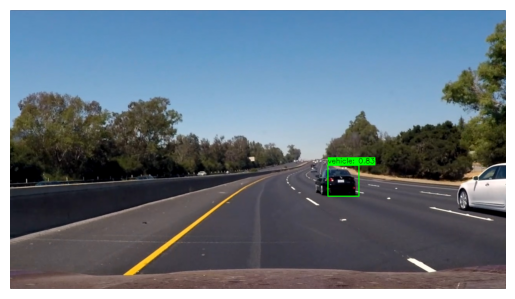

In [6]:
slider = Slider(model, windowSize, (64, 64), 20, scale=1.5)
predict_bbox = slider.predict(image)
predict_bbox = non_maximum_supperssion(predict_bbox, 0.2)
visualize_bbox(image, predict_bbox)